### Waarom? --> DATA 2017...

In [ ]:
import pandas as pd

In [ ]:
file_in = r'P:\RO\0815.10\Werkmap\Jan\werkmap\stuwen_2017.xlsx'

In [ ]:
df = pd.read_excel(file_in, header=[0,1])

In [ ]:
df.columns = df.columns.map(''.join)

In [ ]:
s = df.reset_index()['index']

In [ ]:
s_new = pd.to_datetime(s, format='%d-%m-%Y (%H:%M)')

In [ ]:
out_file = r'D:\Projects\RO\0815.10 Data Challenge 2018\Neerslag//stuwstand_datetime.xlsx'
s_new.to_excel(out_file)

### En nu goed, stuwstanden 2015

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_in = r'D:\Projects\RO\0815.10 Data Challenge 2018\2.2 Tijdreeksen_stuwen.csv'

In [3]:
df = pd.read_csv(file_in, sep=';', header=[0,1], tupleize_cols=True)
df.columns = pd.MultiIndex.from_tuples(df.columns)
columns = pd.DataFrame(df.columns.tolist())
columns.loc[columns[0].str.startswith('Unnamed:'), 0] = np.nan
columns[0] = columns[0].fillna(method='ffill')
mask = pd.isnull(columns[0])
columns[0] = columns[0].fillna('')
df.columns = pd.MultiIndex.from_tuples(columns.to_records(index=False).tolist())
df.head()

c:\python35\lib\site-packages\pandas\io\parsers.py:809: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


Locatie: Stuw Toone, Jan van                    \
             Tijdstip            Niveau Hbov(mNAP) Niveau Hbov(mNAP)   
0  01-01-2010 (00:00)                            -                 -   
1  01-01-2010 (00:15)                            -                 -   
2  01-01-2010 (00:30)                            -                 -   
3  01-01-2010 (00:45)                            -                 -   
4  01-01-2010 (01:00)                            -                 -   

                    Locatie: Stuw Kerkverweide                  \
  Niveau Hben(mNAP)          Niveau Hben(mNAP) Niveau Ss(mNAP)   
0                 -                          -               -   
1                 -                          -               -   
2                 -                          -               -   
3                 -                          -               -   
4                 -                          -               -   

                    Locatie: Stuw Werkendam                                    \
  Niveau Hbov(mNAP)         Niveau Ss(mNAP) Niveau Hben(mNAP) Niveau Ss(mNAP)   
0                 -                       -                 -               -   
1                 -                       -                 -               -   
2                 -                       -                 -               -   
3                 -                       -                 -               -   
4                 -                       -                 -               -   

      ...     Locatie: Stuw Vink, Bas Locatie: Stuw Bulk1                  \
      ...           Niveau Hbov(mNAP)   Niveau Hben(mNAP) Niveau Ss(mNAP)   
0     ...                           -                   -               -   
1     ...                           -                   -               -   
2     ...                           -                   -               -   
3     ...                           -                   -               -   
4     ...                           -                   -               -   

                    Locatie: Stuw Schenkeldijk                    \
  Niveau Hbov(mNAP)          Niveau Hbov(mNAP) Niveau Hben(mNAP)   
0                 -                     -1,263            -1,586   
1                 -                     -1,263            -1,586   
2                 -                     -1,263            -1,586   
3                 -                     -1,265            -1,586   
4                 -                     -1,263            -1,586   

                  Locatie: Stuw Peerenboomgat                                
  Niveau Ss(mNAP)           Niveau Hbov(mNAP) Niveau Hben(mNAP) Stand So(%)  
0          -1,513                      -0,026            -1,152       1,209  
1          -1,513                      -0,026            -1,152       1,209  
2          -1,513                      -0,026            -1,152       1,209  
3          -1,513                      -0,026            -1,152       1,209  
4          -1,513                      -0,026            -1,152       1,209  

[5 rows x 47 columns]

In [4]:
# get column Tijdstip and parse to date_time
s = df.loc[:,('', 'Tijdstip')]
s_new = pd.to_datetime(s.values.flatten(), format='%d-%m-%Y (%H:%M)')
df.index = s_new
df.drop(('', 'Tijdstip'), axis=1, inplace=True)

c:\python35\lib\site-packages\pandas\core\indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [5]:
df.head()

Locatie: Stuw Toone, Jan van                    \
                               Niveau Hbov(mNAP) Niveau Hbov(mNAP)   
2010-01-01 00:00:00                            -                 -   
2010-01-01 00:15:00                            -                 -   
2010-01-01 00:30:00                            -                 -   
2010-01-01 00:45:00                            -                 -   
2010-01-01 01:00:00                            -                 -   

                                      Locatie: Stuw Kerkverweide  \
                    Niveau Hben(mNAP)          Niveau Hben(mNAP)   
2010-01-01 00:00:00                 -                          -   
2010-01-01 00:15:00                 -                          -   
2010-01-01 00:30:00                 -                          -   
2010-01-01 00:45:00                 -                          -   
2010-01-01 01:00:00                 -                          -   

                                                      Locatie: Stuw Werkendam  \
                    Niveau Ss(mNAP) Niveau Hbov(mNAP)         Niveau Ss(mNAP)   
2010-01-01 00:00:00               -                 -                       -   
2010-01-01 00:15:00               -                 -                       -   
2010-01-01 00:30:00               -                 -                       -   
2010-01-01 00:45:00               -                 -                       -   
2010-01-01 01:00:00               -                 -                       -   

                                                      Locatie: Stuw Jamin  \
                    Niveau Hben(mNAP) Niveau Ss(mNAP)   Niveau Hbov(mNAP)   
2010-01-01 00:00:00                 -               -                   -   
2010-01-01 00:15:00                 -               -                   -   
2010-01-01 00:30:00                 -               -                   -   
2010-01-01 00:45:00                 -               -                   -   
2010-01-01 01:00:00                 -               -                   -   

                        ...     Locatie: Stuw Vink, Bas Locatie: Stuw Bulk1  \
                        ...           Niveau Hbov(mNAP)   Niveau Hben(mNAP)   
2010-01-01 00:00:00     ...                           -                   -   
2010-01-01 00:15:00     ...                           -                   -   
2010-01-01 00:30:00     ...                           -                   -   
2010-01-01 00:45:00     ...                           -                   -   
2010-01-01 01:00:00     ...                           -                   -   

                                                       \
                    Niveau Ss(mNAP) Niveau Hbov(mNAP)   
2010-01-01 00:00:00               -                 -   
2010-01-01 00:15:00               -                 -   
2010-01-01 00:30:00               -                 -   
2010-01-01 00:45:00               -                 -   
2010-01-01 01:00:00               -                 -   

                    Locatie: Stuw Schenkeldijk                    \
                             Niveau Hbov(mNAP) Niveau Hben(mNAP)   
2010-01-01 00:00:00                     -1,263            -1,586   
2010-01-01 00:15:00                     -1,263            -1,586   
2010-01-01 00:30:00                     -1,263            -1,586   
2010-01-01 00:45:00                     -1,265            -1,586   
2010-01-01 01:00:00                     -1,263            -1,586   

                                    Locatie: Stuw Peerenboomgat  \
                    Niveau Ss(mNAP)           Niveau Hbov(mNAP)   
2010-01-01 00:00:00          -1,513                      -0,026   
2010-01-01 00:15:00          -1,513                      -0,026   
2010-01-01 00:30:00          -1,513                      -0,026   
2010-01-01 00:45:00          -1,513                      -0,026   
2010-01-01 01:00:00          -1,513                      -0,026   

                                           

In [31]:
df.head().T.loc['Locatie: Stuw Werkendam',:].head()

,2010-01-01 00:00:00,2010-01-01 00:15:00,2010-01-01 00:30:00,2010-01-01 00:45:00,2010-01-01 01:00:00
Niveau Ss(mNAP),-,-,-,-,-
Niveau Hben(mNAP),-,-,-,-,-
Niveau Ss(mNAP),-,-,-,-,-


In [97]:
stuw_peilvak = {'peilvak.65': {'stuw':'Locatie: Stuw Gantel, de', 'parameter': 'Niveau Hbov(mNAP)'},
                'peilvak.132': {'stuw':'Locatie: Stuw Gantel, de', 'parameter': 'Niveau Hben(mNAP)'}, 
                
                #'peilvak.142': {'stuw':'Locatie: Stuw Genderen', 'parameter': 'Niveau Hbov(mNAP)'},
                'peilvak.12': {'stuw':'Locatie: Stuw Genderen', 'parameter': 'Niveau Hben(mNAP)'},
                
                'peilvak.100': {'stuw':'Locatie: Stuw Kerkverweide', 'parameter': 'Niveau Hbov(mNAP)'},
                'peilvak.74': {'stuw':'Locatie: Stuw Kerkverweide', 'parameter': 'Niveau Hben(mNAP)'},
                
                'peilvak.92': {'stuw':'Locatie: Stuw Schenkeldijk', 'parameter': 'Niveau Hbov(mNAP)'},
                'peilvak.95': {'stuw':'Locatie: Stuw Schenkeldijk', 'parameter': 'Niveau Hben(mNAP)'},
                
                'peilvak.34': {'stuw':'Locatie: Stuw Werkendam', 'parameter': 'Niveau Ss(mNAP)'},
                'peilvak.15': {'stuw':'Locatie: Stuw Werkendam', 'parameter': 'Niveau Hben(mNAP)'},
                
                'peilvak.21': {'stuw':'Locatie: Stuw Woudrichem', 'parameter': 'Niveau Hben(mNAP)'},
                
                'peilvak.113': {'stuw':'Locatie: Stuw Wylax', 'parameter': 'Niveau Hben(mNAP)'}
               }

In [98]:
df_sel = pd.DataFrame()
# set in dataframe as index and change name
df_sel.loc[:,'Tijdstip'] = s_new
df_sel.set_index('Tijdstip', inplace=True)
df_sel.index.name = 'datetime'


for i in stuw_peilvak:
    print(i)
    param = stuw_peilvak[i]['parameter']
    locat = stuw_peilvak[i]['stuw']

    try:
        df_tmp = df.loc[:,pd.IndexSlice[locat]][param].iloc[:,0]
    except Exception as e:
        #print(e)
        df_tmp = df.loc[:,pd.IndexSlice[locat]][param]
    df_sel.loc[:,i] = df_tmp

peilvak.21
peilvak.15
peilvak.92
peilvak.100
peilvak.95
peilvak.12
peilvak.74
peilvak.34
peilvak.113
peilvak.65
peilvak.132


In [99]:
df_sel.head()

,peilvak.21,peilvak.15,peilvak.92,peilvak.100,peilvak.95,peilvak.12,peilvak.74,peilvak.34,peilvak.113,peilvak.65,peilvak.132
datetime,,,,,,,,,,,
2010-01-01 00:00:00,"-0,526",-,"-1,263",-,"-1,586","-0,003",-,-,-,"-1,667","-1,908"
2010-01-01 00:15:00,"-0,525",-,"-1,263",-,"-1,586","-0,003",-,-,-,"-1,665","-1,916"
2010-01-01 00:30:00,"-0,525",-,"-1,263",-,"-1,586","-0,004",-,-,-,"-1,667","-1,918"
2010-01-01 00:45:00,"-0,526",-,"-1,265",-,"-1,586","-0,004",-,-,-,"-1,667","-1,903"
2010-01-01 01:00:00,"-0,526",-,"-1,263",-,"-1,586","-0,004",-,-,-,"-1,667","-1,899"


In [100]:
df_sel.replace('-', np.nan, inplace=True)
df_sel = df_sel.apply(lambda x: x.str.replace(',','.'))
df_sel = df_sel.apply(pd.to_numeric)#, errors='ignore')

In [101]:
%matplotlib inline

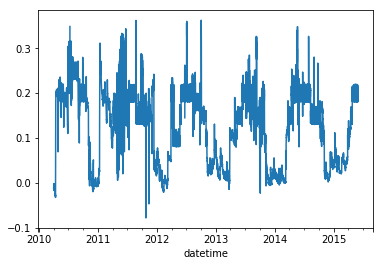

In [111]:
df_sel['2010-04-01':'2015-06-01']['peilvak.12'].resample('H').mean().plot(legend=False)

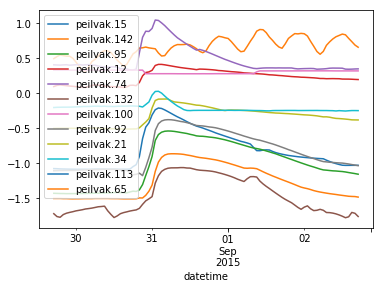

In [91]:
df_sel.resample('H').mean()['2015-08-29 17:00':'2015-09-2 17:00'].plot()

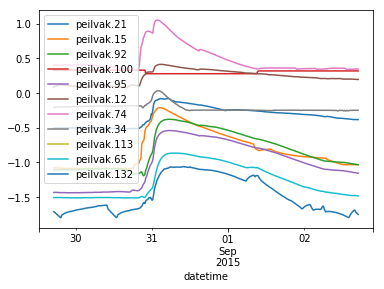

In [112]:
df_sel['2015-08-29 17:00':'2015-09-2 17:00'].plot()

In [67]:
out_csv = r'D:\Projects\RO\0815.10 Data Challenge 2018\Neerslag//stuw_standen_peilvak.csv'
df_sel.to_csv(out_csv)

In [113]:
df_sel.index.name

'datetime'